# Exploring your working directory

In order to import data into Python, you should first have an idea of what files are in your working directory.

IPython, which is running on DataCamp's servers, has a bunch of cool commands, including its magic commands. For example, starting a line with ! gives you complete system shell access. This means that the IPython magic command ! ls will display the contents of your current directory.

In [1]:
! ls

4.1_data_types.ipynb             cta_daily_summary_tools.txt
baby_names.txt                   deneme
chicago_crime.txt                importing_data_into_python.ipynb
cta_daily_station_tools.txt


# Importing entire text files

Here you'll get experience opening a text file, printing its contents to the shell and, finally, closing it.

In [6]:
filename = 'chicago_crime.txt'
file = open(filename, mode='r')
text = file.read()
file.close()

In [202]:
pwd

'/Users/onlyone/Documents/Springboard/Datas'

In [203]:
cd ..

/Users/onlyone/Documents/Springboard


In [204]:
ls

20170710_NATURAL LANGUAGE PROCESSING PROJECTS.docx
20170710_NATURAL LANGUAGE PROCESSING PROJECTS.pdf
20180710_1. Introduction- What Is Data Science? - Doing Data Science [Book].pdf
20180710_Thirteen Companies That Use Deep Learning To Produce Actionable Results.docx
20180710_Thirteen Companies That Use Deep Learning To Produce Actionable Results.pdf
20180711_How Successful People Think Differently – The Mission – Medium.pdf
20180711_What Makes A LinkedIn Profile Great.pdf
20180712_5 LinkedIn Summary Templates to Try - The Muse.pdf
Capstone Projects/
Datas/
Importing Data into Python_Slides.pdf
Interview/
MINST.txt
Prework Notes/
Thirteen Companies That Use Deep Learning To Produce Actionable Results.pdf
Unit Plan-1 : What is Data Science - Google Docs.pdf
What Makes A LinkedIn Profile Great.docx
data_types/
importing_data_into_python-1.1.pdf
importing_data_into_python-1.2.pdf
importing_data_into_python-1.pdf
seaslugs.txt
titanic.csv


In [205]:
with open('seaslugs.txt', mode='r') as ahmet:

In [211]:
print(ahmet.readline())

In [110]:
print(text[:19]) 
# burada n'nci elemanin ciktini al dersek sadece bir karakter cikartir, cunku tum veriyi duz yazi olarak algiliyor

Time	Percent
99	0.0


In [8]:
print(file.closed)

True


In [12]:
with open('chicago_crime.txt') as file:
    print(file.readline())

    #print(file.read())

Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,District



# Using NumPy to import flat files

In [15]:
import numpy as np

In [19]:
filename = 'MINST.txt'
data = np.loadtxt(filename, delimiter=',')

In [20]:
print(data)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [2. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [5. 0. 0. ... 0. 0. 0.]]


In [21]:
print(type(data))

<class 'numpy.ndarray'>


In [ ]:
# 29-31 not seen yet

In [29]:
im = data[21, 1:]
im_sq = np.reshape(im, (28, 28))

In [30]:
import matplotlib.pyplot as plt

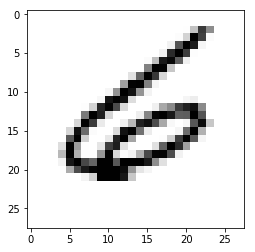

In [31]:
plt.imshow(im_sq, cmap='Greys', interpolation='nearest')

# Customizing your NumPy import

What if there are rows, such as a header, that you don't want to import? What if your file has a delimiter other than a comma? What if you only wish to import particular columns?

There are a number of arguments that np.loadtxt() takes that you'll find useful: delimiter changes the delimiter that loadtxt() is expecting, for example, you can use ',' and '\t' for comma-delimited and tab-delimited respectively; skiprows allows you to specify how many rows (not indices) you wish to skip; usecols takes a list of the indices of the columns you wish to keep.

In [38]:
data = np.loadtxt(filename, delimiter=',', skiprows=1, usecols=[0, 2])

In [54]:
print(data[3])

['99' '0.067']


In [48]:
data = np.loadtxt('seaslugs.txt', delimiter='\t', dtype=str)

In [53]:
print(data[0])

['Time' 'Percent']


In [62]:
data_float = np.loadtxt('seaslugs.txt', delimiter='\t', dtype=float, skiprows=1)

In [65]:
print(data_float[10])

[0.    0.533]


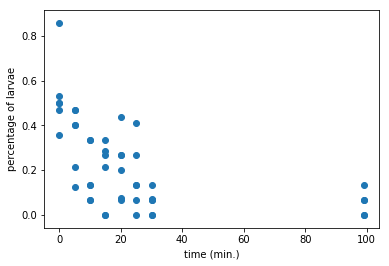

In [64]:
plt.scatter(data_float[:, 0], data_float[:, 1])
plt.xlabel('time (min.)')
plt.ylabel('percentage of larvae')
plt.show()

# Working with mixed datatypes (1)

Much of the time you will need to import datasets which have different datatypes in different columns; one column may contain strings and another floats, for example. The function np.loadtxt() will freak at this. There is another function, np.genfromtxt(), which can handle such structures. If we pass dtype=None to it, it will figure out what types each column should be.

Import 'titanic.csv' using the function np.genfromtxt() as follows:

data = np.genfromtxt('titanic.csv', delimiter=',', names=True, dtype=None)
Here, the first argument is the filename, the second specifies the delimiter , and the third argument names tells us there is a header. Because the data are of different types, data is an object called a structured array. Because numpy arrays have to contain elements that are all the same type, the structured array solves this by being a 1D array, where each element of the array is a row of the flat file imported. You can test this by checking out the array's shape in the shell by executing np.shape(data).

Acccessing rows and columns of structured arrays is super-intuitive: to get the ith row, merely execute data[i] and to get the column with name 'Fare', execute data['Fare'].

In [69]:
data = np.genfromtxt('titanic.csv', delimiter=',', names=True, dtype=None)

/Users/onlyone/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  """Entry point for launching an IPython kernel.


In [200]:
np.shape(data)

(5, 11)

In [ ]:
print(data['Survived'])

In [74]:
print(data[7])

(8, 0, 3, b'male', 2., 3, 1, b'349909', 21.075, b'', b'S')


# Working with mixed datatypes (2)

You have just used np.genfromtxt() to import data containing mixed datatypes. There is also another function np.recfromcsv() that behaves similarly to np.genfromtxt(), except that its default dtype is None. In this exercise, you'll practice using this to achieve the same result.

In [82]:
d = np.recfromcsv('titanic.csv')

/Users/onlyone/anaconda3/lib/python3.6/site-packages/numpy/lib/npyio.py:2266: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


In [83]:
print(d[:3])

[(1, 0, 3, b'male', 22., 1, 0, b'A/5 21171',  7.25  , b'', b'S')
 (2, 1, 1, b'female', 38., 1, 0, b'PC 17599', 71.2833, b'C85', b'C')
 (3, 1, 3, b'female', 26., 0, 0, b'STON/O2. 3101282',  7.925 , b'', b'S')]


# Using pandas to import flat files as DataFrames (1)

In the last exercise, you were able to import flat files containing columns with different datatypes as numpy arrays. However, the DataFrame object in pandas is a more appropriate structure in which to store such data and, thankfully, we can easily import files of mixed data types as DataFrames using the pandas functions read_csv() and read_table().

In [84]:
import pandas as pd

In [85]:
titanic = pd.read_csv('titanic.csv')

In [86]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Dealing with missing values and incorrect data types /// baska bir DataCamp makalesinden alinti. eksik degerli sutunda diger degerlerde otomatik olarak "object" olarak algilaniyorki, bu durumda float ya da int degerler ile islem yapmak mumkun olmuyor. bu problemi asmak icin eksik olan degerlere "na_values" ile atama yapiyoruz
# df = pd.read_csv("data/cereal.csv", skiprows = 1, na_values = ['no info', '.'])

# Using pandas to import flat files as DataFrames (2)

In the last exercise, you were able to import flat files into a pandas DataFrame. As a bonus, it is then straightforward to retrieve the corresponding numpy array using the attribute values. You'll now have a chance to do this using the MNIST dataset, which is available as digits.csv.

In [87]:
file = 'titanic.csv'

In [88]:
data = pd.read_csv(file, nrows=5, header=None)

In [94]:
data_array = data.values

In [93]:
print(type(data_array))

<class 'numpy.ndarray'>


# Customizing your pandas import

The pandas package is also great at dealing with many of the issues you will encounter when importing data as a data scientist, such as comments occurring in flat files, empty lines and missing values. Note that missing values are also commonly referred to as NA or NaN. To wrap up this chapter, you're now going to import a slightly corrupted copy of the Titanic dataset titanic_corrupt.txt, which

* Dealing with missing values and incorrect data types /// baska bir DataCamp makalesinden alinti. eksik degerli sutunda diger degerlerde otomatik olarak "object" olarak algilaniyorki, bu durumda float ya da int degerler ile islem yapmak mumkun olmuyor. bu problemi asmak icin eksik olan degerlere "na_values" ile atama yapiyoruz. sep (the pandas version of delim)

* df = pd.read_csv("data/cereal.csv", skiprows = 1, na_values = ['no info', '.', 'Nothing])

In [ ]:
file = 'titanic_corrupt.txt'
data = pd.read_csv(file, sep='\t', comment='#', na_values='Nothing')
print(data.head())
pd.DataFrame.hist(data[['Age']])
plt.xlabel('Age (years)')
plt.ylabel('count')
plt.show()

# Introduction to other file types

# Not so flat any more

In Chapter 1, you learned how to use the IPython magic command ! ls to explore your current working directory. You can also do this natively in Python using the library os, which consists of miscellaneous operating system interfaces.

The first line of the following code imports the library os, the second line stores the name of the current directory in a string called wd and the third outputs the contents of the directory in a list to the shell.

import os
wd = os.getcwd()
os.listdir(wd)

In [120]:
pwd

'/Users/onlyone/Documents'

In [115]:
import os

In [116]:
wd = os.getcwd()

In [122]:
os.listdir(wd)

['dene.txt',
 'a2.1.py',
 'HALIL Dta Scıence Notları.docx',
 '~$Book1.xlsx',
 '.DS_Store',
 'Tax E-filing_1.pdf',
 'test1_for_a2.py',
 '.localized',
 'Book1.xlsx',
 'Lease Contract_Final.pdf',
 'CV_Huseyin YILMAZ.pages',
 'test.py',
 'data1.jpg',
 'data1.1.jpg',
 'Springboard',
 'home challenga',
 'Lease Contract_1221SG_2018-2019.pdf',
 'Notice of help.pages',
 'a2.py',
 'test2_for_a2.py']

# Loading a pickled file

There are a number of datatypes that cannot be saved easily to flat files, such as lists and dictionaries. If you want your files to be human readable, you may want to save them as text files in a clever manner. JSONs, which you will see in a later chapter, are appropriate for Python dictionaries.

However, if you merely want to be able to import them into Python, you can serialize them. All this means is converting the object into a sequence of bytes, or a bytestream.

In this exercise, you'll import the pickle package, open a previously pickled data structure from a file and load it.

In [ ]:
import pickle

with open('data.pkl', 'rb') as file:
    d = pickle.load(file)

print(d)
print(type(d))

In [ ]:
{'June': '69.4', 'Aug': '85', 'Airline': '8', 'Mar': '84.4'}
<class 'dict'>

# Listing sheets in Excel files

In [121]:
import pandas as pd

In [145]:
file='battledeath.xlsx'

In [146]:
hakan=pd.ExcelFile(file)

In [140]:
print(hakan.sheet_names)

['2002', '2004']


In [143]:
print(hakan)

# Importing sheets from Excel files

In [154]:
hakan1=hakan.parse('2002') # sheet name as string # parse = ayristirmak
print(hakan1.head())

  War, age-adjusted mortality due to       2002
0                        Afghanistan  36.083990
1                            Albania   0.128908
2                            Algeria  18.314120
3                            Andorra   0.000000
4                             Angola  18.964560


In [155]:
hakan2=hakan.parse(0) # sheet name as a float
print(hakan2.head())

  War, age-adjusted mortality due to       2002
0                        Afghanistan  36.083990
1                            Albania   0.128908
2                            Algeria  18.314120
3                            Andorra   0.000000
4                             Angola  18.964560


# Customizing your spreadsheet import

In [162]:
hakan1 = hakan.parse(0, skiprows=1, names=['Country', 'AMM due to War (2002)'])
print(hakan1.head())

# ?????? burada, names'in altina yazilan "'AMM due to War (2002)'" ifade kaldirildiginda kod calismiyor. nedenini anlamadim

               Country  AMM due to War (2002)
0              Albania               0.128908
1              Algeria              18.314120
2              Andorra               0.000000
3               Angola              18.964560
4  Antigua and Barbuda               0.000000


In [ ]:
hakan2 = hakan.parse(1, parse_cols=[0], skiprows=1, names=['Country'])
print(hakan2.head())

# bu komut calismadi, neredeyse exercise'daki ile ayni ifadeler, anlamadim

# Importing SAS/Stata files using pandas

In [ ]:
# How to import SAS7BDAT
# from sas7bdat import SAS7BDAT

In [175]:
import pandas as pd

In [185]:
import matplotlib.pyplot as plt

In [ ]:
from sas7bdat import SAS7BDAT

In [ ]:
with SAS7BDAT('sales.sas7bdat') as file
    df_sas = file.to_data_frame()
print(df_sas.head())

# Plot histogram of DataFrame features (pandas and pyplot already imported)
pd.DataFrame.hist(df_sas[['P']])
plt.ylabel('count')
plt.show()

# SAS7BDAT ile ilgii komutu kabul etmedigi icin calistiramadim.

# import Stata files

In [ ]:
df = pd.read_stata('disarea.dta')
print(df.head())

# Plot histogram of one column of the DataFrame
pd.DataFrame.hist(df[['disa10']])
plt.xlabel('Extent of disease')
plt.ylabel('Number of coutries')
plt.show()

# Using h5py to import HDF5 files

In this exercise, you'll import it using the h5py library. You'll also print out its datatype to confirm you have imported it correctly. You'll then study the structure of the file in order to see precisely what HDF groups it contains.

In [ ]:
# Import packages
import numpy as np
import h5py

# Assign filename: file
file = 'LIGO_data.hdf5'

# Load file: data
data = h5py.File(file, 'r')

# Print the datatype of the loaded file
print(type(data))

# Print the keys of the file
for key in data.keys():
    print(key)
    
<class 'h5py._hl.files.File'>
Description
DescriptionURL
Detector
Duration
GPSstart
Observatory
Type
UTCstart

# Extracting data from your HDF5 file

In this exercise, you'll extract some of the LIGO experiment's actual data from the HDF5 file and you'll visualize it.

In [ ]:
# Get the HDF5 group: group
group = data['strain']

# Check out keys of group
for key in group.keys():
    print(key)

# Set variable equal to time series data: strain
strain = data['strain']['Strain'].value

# Set number of time points to sample: num_samples
num_samples = 10000

# Set time vector
time = np.arange(0, 1, 1/num_samples)

# Plot data
plt.plot(time, strain[:num_samples])
plt.xlabel('GPS Time (s)')
plt.ylabel('strain')
plt.show()

# Loading .mat files

In [ ]:
import scipy.io

mat = scipy.io.loadmat('albeck_gene_expression.mat')

# scipy.io.savemat -> write mat files

print(type(mat))
<class 'dict'>

# The structure of .mat in Python

In [ ]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

# Print the keys of the MATLAB dictionary
for key in mat.keys():
    print(key)

# ya da dogrudan "print(mat.keys())"

# Print the type of the value corresponding to the key 'CYratioCyt'
print(type(mat['CYratioCyt']))

# Print the shape of the value corresponding to the key 'CYratioCyt'
print(np.shape(mat['CYratioCyt']))

# Subset the array and plot it
data = mat['CYratioCyt'][25, 5:]
fig = plt.figure()
plt.plot(data)
plt.xlabel('time (min.)')
plt.ylabel('normalized fluorescence (measure of expression)')
plt.show()

# Relational Databases

In [190]:
from sqlalchemy import create_engine

In [191]:
engine = create_engine('sqlite:///Chinook.sqlite')

In [193]:
table_names = engine.table_names()
print(table_names)

['Album', 'Artist', 'Customer', 'Employee', 'Genre', 'Invoice', 'InvoiceLine', 'MediaType', 'Playlist', 'PlaylistTrack', 'Track']


In [ ]:
# Workflow of SQL querying
● Import packages and functions
● Create the database engine
● Connect to the engine
● Query the database
● Save query results to a DataFrame
● Close the connection

In [1]: from sqlalchemy import create_engine
In [2]: import pandas as pd
In [3]: engine = create_engine('sqlite:///Northwind.sqlite')
In [4]: con = engine.connect()
In [5]: rs = con.execute("SELECT * FROM Orders")
In [6]: df = pd.DataFrame(rs.fetchall())
In [7]: df.columns = rs.keys()
In [8]: con.close()
    
# Using the Context Manager
In [1]: from sqlalchemy import create_engine
In [2]: import pandas as pd
In [3]: engine = create_engine('sqlite:///Northwind.sqlite')
In [4]: with engine.connect() as con:
   ...: rs = con.execute("SELECT OrderID, OrderDate, ShipName FROM Orders")
   ...: df = pd.DataFrame(rs.fetchmany(size=5))
   ...: df.columns = rs.keys()

# Customizing the Hello World of SQL Queries

In [ ]:
with engine.connect() as con:
    rs = con.execute("SELECT LastName, Title FROM Employee")
    df = pd.DataFrame(rs.fetchmany(size=3))
    df.columns = rs.keys()

print(len(df))
print(df.head())

#
3
  LastName                Title
0    Adams      General Manager
1  Edwards        Sales Manager
2  Peacock  Sales Support Agent

# Filtering your database records using SQL's WHERE

In [ ]:
engine = create_engine('sqlite:///Chinook.sqlite')

with engine.connect() as con:
    rs = con.execute("SELECT * FROM Employee WHERE EmployeeId >= 6")
    df = pd.DataFrame(rs.fetchall())
    df.columns = rs.keys()

print(df.head())

# Ordering your SQL records with ORDER BY

In [ ]:
engine = create_engine('sqlite:///Chinook.sqlite')

with engine.connect() as con:
    rs = con.execute("SELECT * FROM Employee ORDER BY BirthDate")
    df = pd.DataFrame(rs.fetchall())

df.columns = rs.keys()

print(df.head())

# Querying relational databases directly with pandas

In [ ]:
In [5]: df = pd.read_sql_query("SELECT * FROM Orders", engine)

In [ ]:
# Import packages
from sqlalchemy import create_engine
import pandas as pd

# Create engine: engine
engine = create_engine('sqlite:///Chinook.sqlite')

# Execute query and store records in DataFrame: df
df = pd.read_sql_query("SELECT * FROM Album", engine)

# Print head of DataFrame
print(df.head())

# Open engine in context manager
# Perform query and save results to DataFrame: df1
with engine.connect() as con:
    rs = con.execute("SELECT * FROM Album")
    df1 = pd.DataFrame(rs.fetchall())
    df1.columns = rs.keys()

# Confirm that both methods yield the same result: does df = df1 ?
print(df.equals(df1))

   AlbumId                                  Title  ArtistId
0        1  For Those About To Rock We Salute You         1
1        2                      Balls to the Wall         2
2        3                      Restless and Wild         2
3        4                      Let There Be Rock         1
4        5                               Big Ones         3
True

# Pandas for more complex querying

In [ ]:
df = pd.read_sql_query("SELECT * FROM Employee WHERE EmployeeId >= 6 ORDER BY BirthDate", engine)

# Advanced querying: exploiting table relationships

In [ ]:
In [1]: from sqlalchemy import create_engine
In [2]: import pandas as pd
In [3]: engine = create_engine('sqlite:///Northwind.sqlite')
In [4]: df = pd.read_sql_query("SELECT OrderID, CompanyName FROM Orders INNER JOIN Customers on 
                               Orders.CustomerID = Customers.CustomerID", engine)
In [5]: print(df.head())
OrderID CompanyName
0 10248 Vins et alcools Chevalier
1 10251 Victuailles en stock
2 10254 Chop-suey Chinese
3 10256 Wellington Importadora
4 10258 Ernst Handel

In [ ]:
# Open engine in context manager
# Perform query and save results to DataFrame: df
with engine.connect() as con:
    rs = con.execute("SELECT Title, Name FROM Album INNER JOIN Artist on Album.ArtistId = Artist.ArtistId")
    df = pd.DataFrame(rs.fetchall())
    df.columns = rs.keys()

# Print head of DataFrame df
print(df.head())

                                   Title       Name
0  For Those About To Rock We Salute You      AC/DC
1                      Balls to the Wall     Accept
2                      Restless and Wild     Accept
3                      Let There Be Rock      AC/DC
4                               Big Ones  Aerosmith

In [ ]:
df = pd.read_sql_query("SELECT * FROM PlaylistTrack INNER JOIN Track on 
     PlaylistTrack.TrackId = Track.TrackId WHERE Milliseconds < 250000", engine)